In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



In [24]:

image_path = "dog_image.jpg"
color_image = cv2.imread(image_path)
gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)



In [43]:

def detect_blobs_log(image, threshold):
    blurred_image = cv2.GaussianBlur(image, (9, 9), 2)
    log = cv2.Laplacian(blurred_image, cv2.CV_64F)
    _, binary_image = cv2.threshold(np.abs(log), threshold, 255, cv2.THRESH_BINARY)
    return binary_image

log_blobs = detect_blobs_log(gray_image, threshold=10)



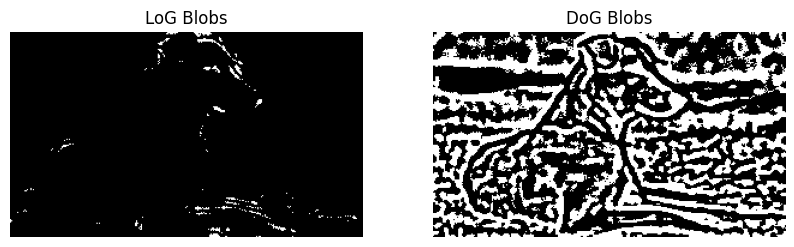

In [44]:
# DoG Detection
def detect_blobs_dog(image, sigma1, sigma2):
    blur1 = cv2.GaussianBlur(image, (9, 9), sigma1)
    blur2 = cv2.GaussianBlur(image, (9, 9), sigma2)
    dog = blur1 - blur2
    _, binary_image = cv2.threshold(np.abs(dog), 20, 255, cv2.THRESH_BINARY)
    return binary_image

dog_blobs = detect_blobs_dog(gray_image, sigma1=2, sigma2=4)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(log_blobs, cmap="gray")
axes[0].set_title("LoG Blobs")
axes[0].axis("off")
axes[1].imshow(dog_blobs, cmap="gray")
axes[1].set_title("DoG Blobs")
axes[1].axis("off")
plt.show()


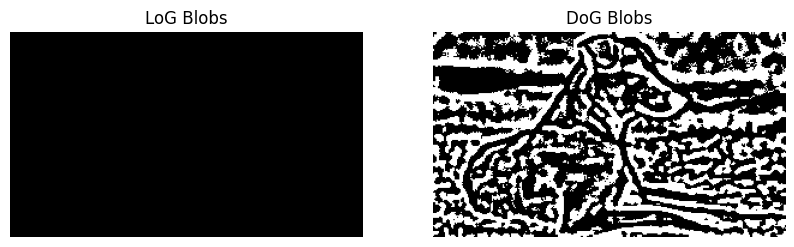

In [50]:
#threshold=50 and above i am using 10
log_blobs = detect_blobs_log(gray_image, threshold=50)
dog_blobs = detect_blobs_dog(gray_image, sigma1=2, sigma2=4)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(log_blobs, cmap="gray")
axes[0].set_title("LoG Blobs")
axes[0].axis("off")
axes[1].imshow(dog_blobs, cmap="gray")
axes[1].set_title("DoG Blobs")
axes[1].axis("off")
plt.show()

In [26]:
# Blob Detection using SimpleBlobDetector
def detect_blobs_opencv(image, min_area, max_area, threshold_step):
    params = cv2.SimpleBlobDetector_Params()
    params.filterByArea = True
    params.minArea = min_area
    params.maxArea = max_area
    params.thresholdStep = threshold_step
    params.minThreshold = 10
    params.maxThreshold = 200
    detector = cv2.SimpleBlobDetector_create(params)
    keypoints = detector.detect(image)
    result = cv2.drawKeypoints(
        image, keypoints, np.array([]), (0, 0, 255),
        cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
    )
    return result, keypoints


opencv_blobs, keypoints = detect_blobs_opencv(gray_image, min_area=50, max_area=5000, threshold_step=10)


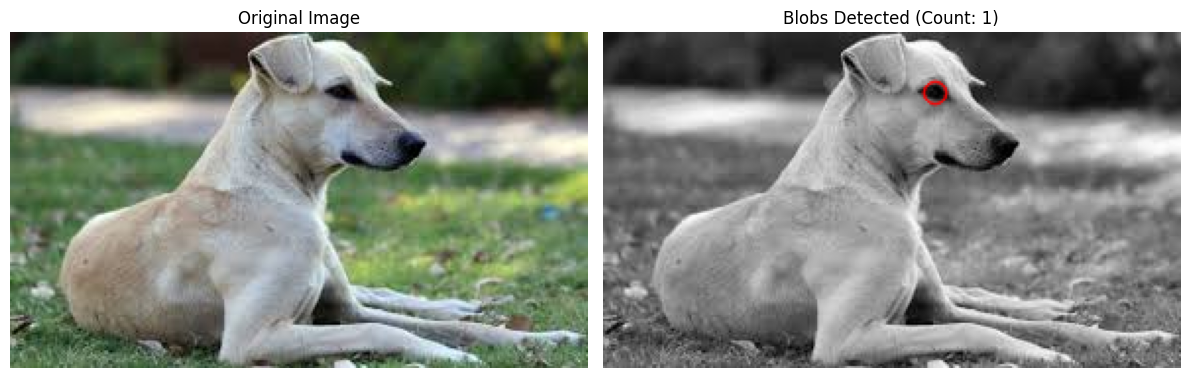

In [8]:

# Plot the original and blob-detected images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(opencv_blobs, cv2.COLOR_BGR2RGB))
axes[1].set_title(f"Blobs Detected (Count: {len(keypoints)})")
axes[1].axis("off")

plt.tight_layout()
plt.show()


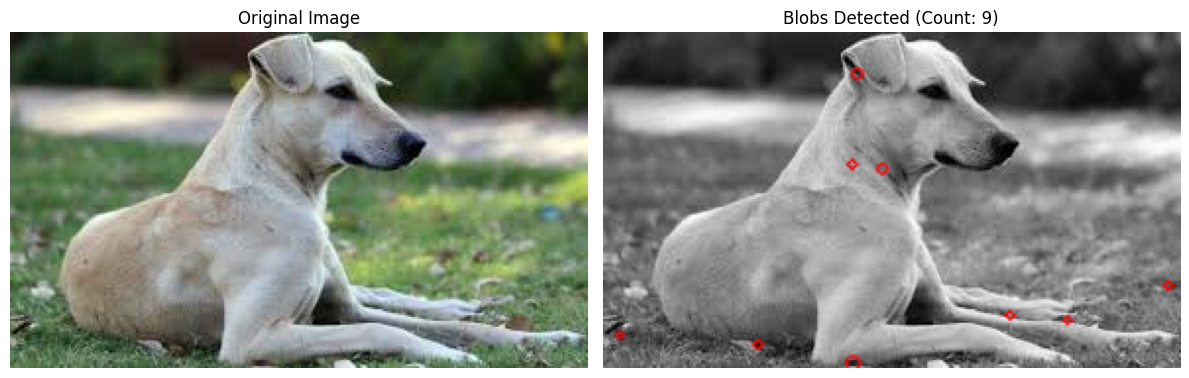

In [52]:
#experimenting  with differnt min area and max area with threshold values.
opencv_blobs, keypoints = detect_blobs_opencv(gray_image, min_area=10, max_area=10000, threshold_step=20)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(opencv_blobs, cv2.COLOR_BGR2RGB))
axes[1].set_title(f"Blobs Detected (Count: {len(keypoints)})")
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [27]:
import cv2
import matplotlib.pyplot as plt


log_blobs_uint8 = cv2.convertScaleAbs(log_blobs)
dog_blobs_uint8 = cv2.convertScaleAbs(dog_blobs)

def visualize_blobs_on_color(color_image, binary_blob_image):
    binary_blob_image = cv2.cvtColor(binary_blob_image, cv2.COLOR_GRAY2BGR)
    return cv2.addWeighted(color_image, 0.7, binary_blob_image, 0.3, 0)





In [28]:

log_blob_visualization = visualize_blobs_on_color(color_image, log_blobs_uint8)
dog_blob_visualization = visualize_blobs_on_color(color_image, dog_blobs_uint8)



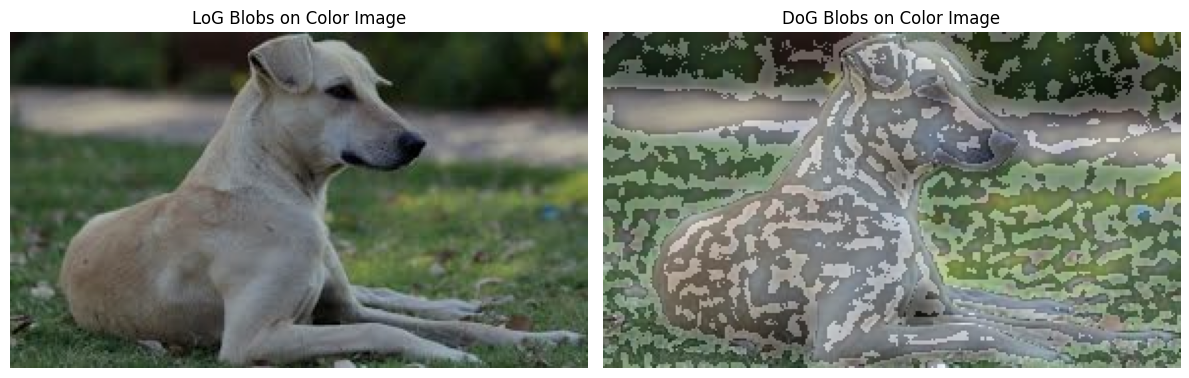

In [29]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(cv2.cvtColor(log_blob_visualization, cv2.COLOR_BGR2RGB))
axes[0].set_title("LoG Blobs on Color Image")
axes[0].axis("off")

axes[1].imshow(cv2.cvtColor(dog_blob_visualization, cv2.COLOR_BGR2RGB))
axes[1].set_title("DoG Blobs on Color Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

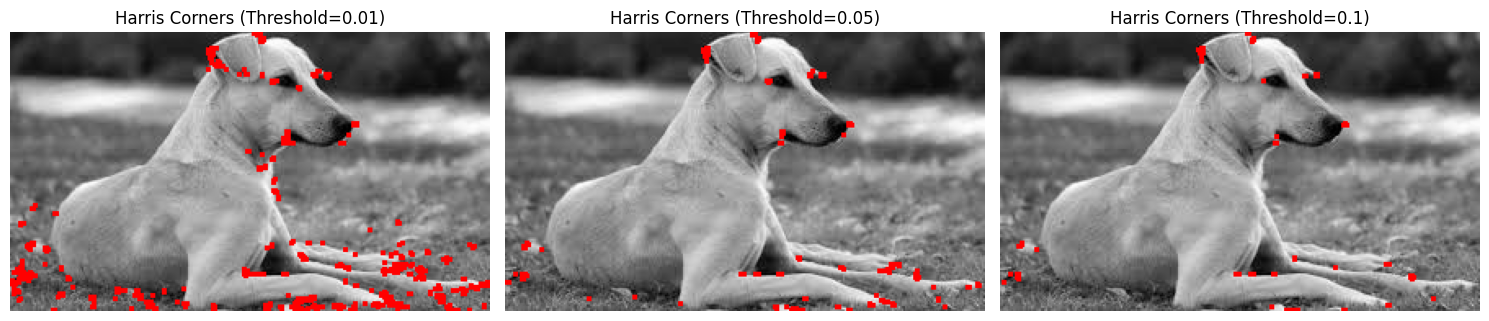

In [31]:
# Harris Corner Detection Function
def harris_corner_detection(image, threshold):
    gray_float = np.float32(image)
    harris_response = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
    harris_response = cv2.dilate(harris_response, None)

    corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    corners[harris_response > threshold * harris_response.max()] = [0, 0, 255]
    return corners


thresholds = [0.01, 0.05, 0.1]
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, threshold in enumerate(thresholds):
    result = harris_corner_detection(gray, threshold)
    axes[i].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    axes[i].set_title(f"Harris Corners (Threshold={threshold})")
    axes[i].axis("off")

plt.tight_layout()
plt.show()

<ipython-input-32-2d22988b6556>:16: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


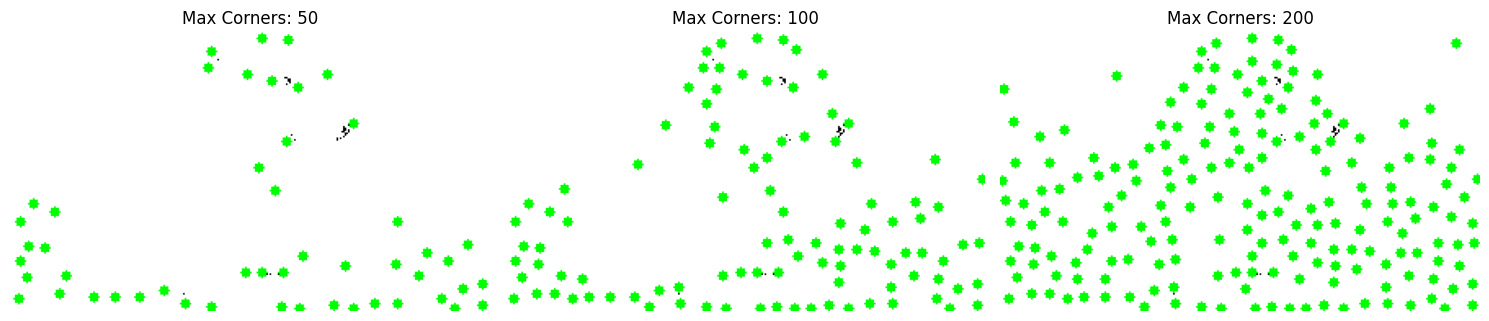

In [32]:
image = cv2.imread('dog_image.jpg', cv2.IMREAD_GRAYSCALE)


image = np.float32(image)

def shi_tomasi_corner_detection(image, max_corners):
    corners = cv2.goodFeaturesToTrack(image, maxCorners=max_corners, qualityLevel=0.01, minDistance=10)
    return corners

max_corners_list = [50, 100, 200]

fig, axs = plt.subplots(1, len(max_corners_list), figsize=(15, 5))

for i, max_corners in enumerate(max_corners_list):
    corners = shi_tomasi_corner_detection(image, max_corners)
    corners = np.int0(corners)
    image_copy = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    for corner in corners:
        x, y = corner.ravel()
        cv2.circle(image_copy, (x, y), 3, (0, 255, 0), -1)
    axs[i].imshow(image_copy)
    axs[i].set_title(f'Max Corners: {max_corners}')
    axs[i].axis('off')

plt.tight_layout()
plt.show()